圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


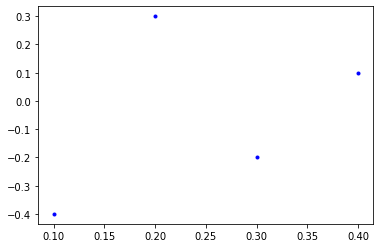

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)
plt.plot(np.real(gamma_points[:]),np.imag(gamma_points[:]),'b.')


print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


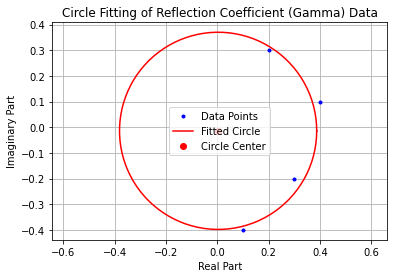

圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)

# 繪製原始數據點
plt.plot(np.real(gamma_points[:]), np.imag(gamma_points[:]), 'b.', label='Data Points')

# 繪製擬合的圓
theta = np.linspace(0, 2*np.pi, 100)
x = xc + r * np.cos(theta)
y = yc + r * np.sin(theta)
plt.plot(x, y, 'r-', label='Fitted Circle')

# 標記圓心
plt.plot(xc, yc, 'ro', label='Circle Center')

# 圖形設置
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Circle Fitting of Reflection Coefficient (Gamma) Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


## 試試看用S11化緣!!


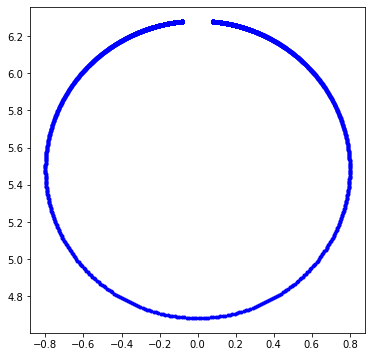

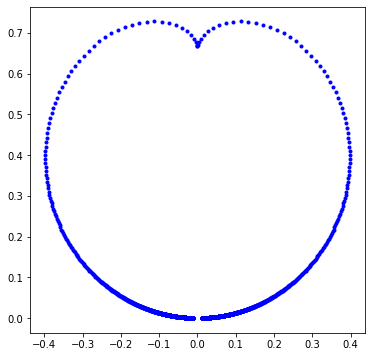

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def s11( omega, omega_m, alpha, kappa):
    Gamma = 2*np.pi*(alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))*2*np.pi
    return s11

def s21( omega, omega_c, omega_m, kappa, alpha, beta, gamma):
    S_21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return (S_21)

omega = np.linspace(-0.5, 0.5, 5000)  #(GHz)
omega_m = 0
omega_c = 0 
kappa = 0.0064 #(GHz)
alpha = 0.0016 #(GHz)
beta =  0.0016 #(GHz)
gamma =  0.0016 #(GHz)

data = s11( omega, omega_m, alpha, kappa)
data_2 = s21(omega, omega_c, omega_m, kappa, alpha, beta, gamma)

plt.figure(figsize=(6,6))
plt.plot(data.imag, data.real, 'b.')

plt.figure(figsize=(6,6))
plt.plot(data_2.imag, data_2.real, 'b.')


